<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/random_variables_and_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Probability Space
It is a probability triple $(\Sigma,F,P)$, where :
- $\Sigma$ is a sample space or set of possible outcome or universe of possibilities.
- $F$ is the event space, known also as sigma-algebra. This is a collection of some subsets of $\Sigma$ which includes $∅$ and $\Sigma$, and countable union of events is an event in $F$ also.
- $P$ is a probability function which assign each event space a real numbers in $[0,1]$ such that $\forall A\in F: P(A)\in [0,1]$, $P(\Sigma)=1=1-P(∅)$ and probability of countable union of mutually exclusive event is the sum of their individual probabilities.

**Example**:
Suppose we throw a 6 sided dice such that each face has an equal probability of landing face up. We have:
$$\Sigma=\{1,2,3,4,5,6\}$$
$$ F=\{∅,\{1\},...,\{6\} ,...,\{1,...,6\} \}=∪_{A\in F}A$$
$$P:F→[0,1] : P(∅)=0, P(\{i\})=\frac{1}{6} \forall i\in \{1,...,6\} , P(\{1,...,6\})=1$$


Event:[], Probability: 0.0000
Event:[1], Probability: 0.1667
Event:[2], Probability: 0.1667
Event:[3], Probability: 0.1667
Event:[4], Probability: 0.1667
Event:[5], Probability: 0.1667
Event:[6], Probability: 0.1667
Event:sigma, Probability: 1.0000


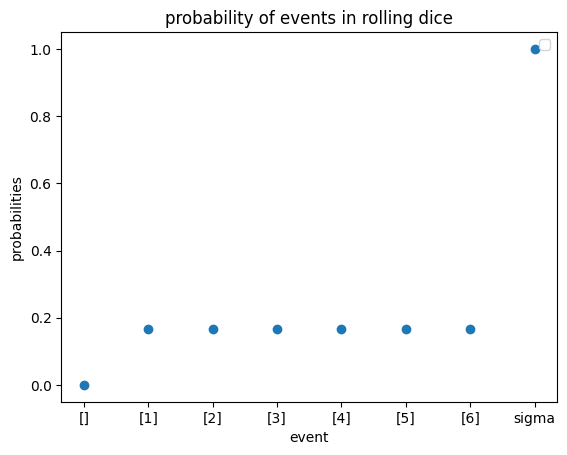

In [5]:


#define the sample space
Sigma=np.array([1,2,3,4,5,6])

#function to roll a dice:
def roll_dice():
  return np.random.choice(Sigma)

#simulation of rolling dice n times
n_roll=10**5
results=np.array([roll_dice() for _ in range(n_roll)])

#calculate the probability based on the above results
def calculate_probability(event):
  if event==[]:
    return 0
  elif event=="sigma":
    return 1

  Sum=0
  dic_event=set()
  for x in event:
    if 1<=x and x<=6:
      dic_event.add(x)
    else:
      pass

  return len(dic_event)/6

events=[[],[1],[2],[3],[4],[5],[6],"sigma"]
probabilities=np.array([calculate_probability(event) for event in events])
for i in range(len(events)):
  print(f"Event:{events[i]}, Probability: {probabilities[i]:.4f}")
x=np.array(range(1,len(events)+1))
plt.xticks(x,events)
plt.xlabel("event")
plt.ylabel("probabilities")
plt.plot(x,probabilities,"o")
plt.title("probability of events in rolling dice")
plt.legend()

plt.show()

## discrete and continuous Probability Distribution


### Bernouilli distribution
$$0\leq p \leq 1 \; ; \; P(X=1)=p \; ; \;P(X=0)=1-p\; ; \;$$
Cumulative density function (CDF) :
$P(X< x)=0$ if $x\leq 0$, $P(X<x)=1-p$ if $0 \leq x \leq 1$ and $P(X<x)=1$  if  $x>1$.  
$$\mathbb{E}[X]=\sum_{i=0}^1iP(X=i)=0(1-p)+1(p)=p $$
$$Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\sum_{i=0}^1i^2P(X=i)-p^2=p(1-p)$$

In [6]:
#Bernouilli probability Density function of parameter p
def bernouilli_pdf(x,p):
  if x==0:
    return 1-p
  elif x==1:
    return p
  else:
    return 0

#Bernouilli Cumulative Distribution function of parameter p P(X<=x)
def bernouilli_cdf(x,p):
  if x <0:
    return 0
  elif x==1:
    return 1-p
  elif x>1:
    return 1

def bernouilli_mean(p):
  return p
def bernouilli_variance(p):
  return p*(1-p)



### Poisson distribution
Rate $\lambda \in (0,\infty)$, $k\in \{0,1,...\}$. PDF : $\displaystyle P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}$. It has CDF : $P(X<x)$.   
$$\mathbb{E}[X]=\sum_{k=0}^\infty kP(X=k)=\sum_{k=0}^\infty k\frac{\lambda^k}{k!}e^{-\lambda}=e^{-\lambda}\lambda \sum_{k=0}^\infty \frac{\lambda^k}{k!}=\lambda$$
$$Var(X)=\mathbb{E}[X^2]-\mathbb{E}[X]^2=\sum_{k=0}^\infty k^2P(X=k) -\lambda^2=\sum_{k=0}^\infty k^2\frac{\lambda^k}{k!}e^{-\lambda}-\lambda^2=e^{-\lambda}\lambda \left(\sum_{k=0}^\infty k\frac{\lambda^k}{k!}+\sum_{k=0}^\infty \frac{\lambda^k}{k!} \right)-\lambda^2=e^{-\lambda}\lambda(e^\lambda\lambda +e^\lambda)-\lambda^2=\lambda$$


<ipython-input-32-25ea08160447>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-Lambda)*Lambda**k/np.math.factorial(k)


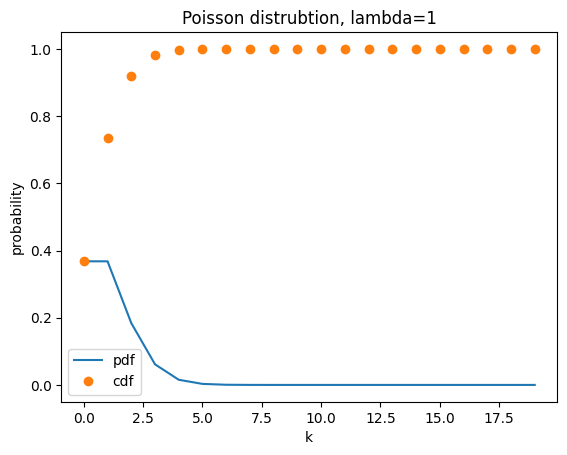

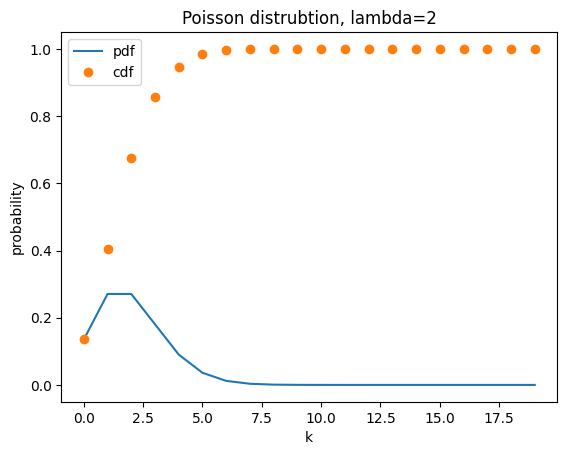

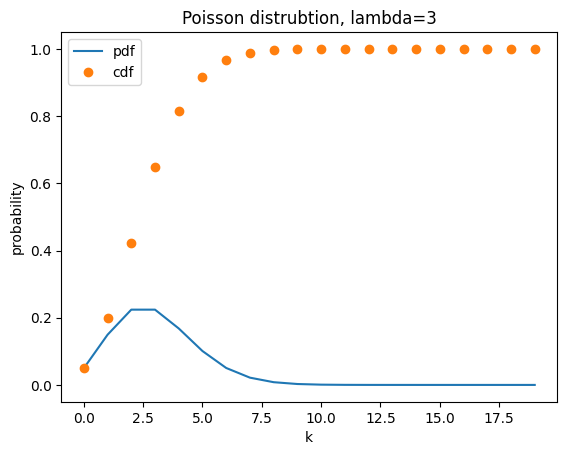

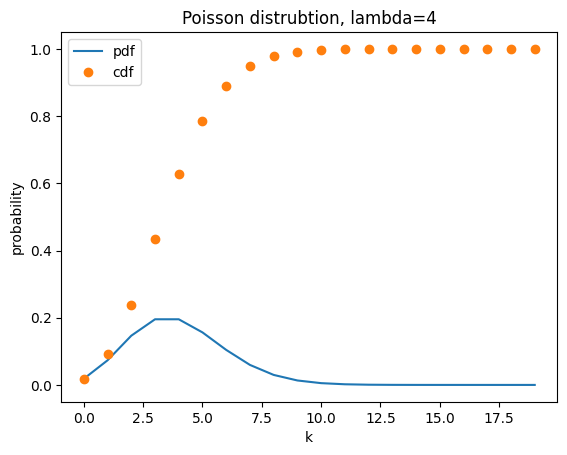

In [32]:
def poisson_pdf(k,Lambda): #k >=0, lambda>0

  return np.exp(-Lambda)*Lambda**k/np.math.factorial(k)
def poisson_cdf(x,Lambda):
  if x<0:
    return 0
  else: #x>=0
    summ=1
    x=int(x)
    for i in range(x,0,-1):
       summ=1+summ*Lambda/i
    summ=np.exp(-Lambda)*summ
    return summ

def poisson_mean(Lambda):
  return Lambda
def poisson_variance(Lambda):
  return Lambda

#plotting of library and the above function
x=np.linspace(0,20,20,endpoint=False,dtype=np.int32)
Lambdas=np.array([1,2,3,4])
for Lambda in Lambdas:
  y1=np.array([poisson_pdf(xx,Lambda) for xx in x])
  y2=np.array([poisson_cdf(xx,Lambda) for xx in x])
  plt.plot(x,y1,label="pdf")
  plt.plot(x,y2,"o",label="cdf")
  plt.legend()
  plt.xlabel("k")
  plt.ylabel("probability")
  plt.title("Poisson distrubtion, lambda="+str(Lambda))
  plt.show()
